In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [83]:
dataset = pd.read_csv('/content/Dataset for heart diseases.csv') # Make sure this is the correct path and filename

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [85]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


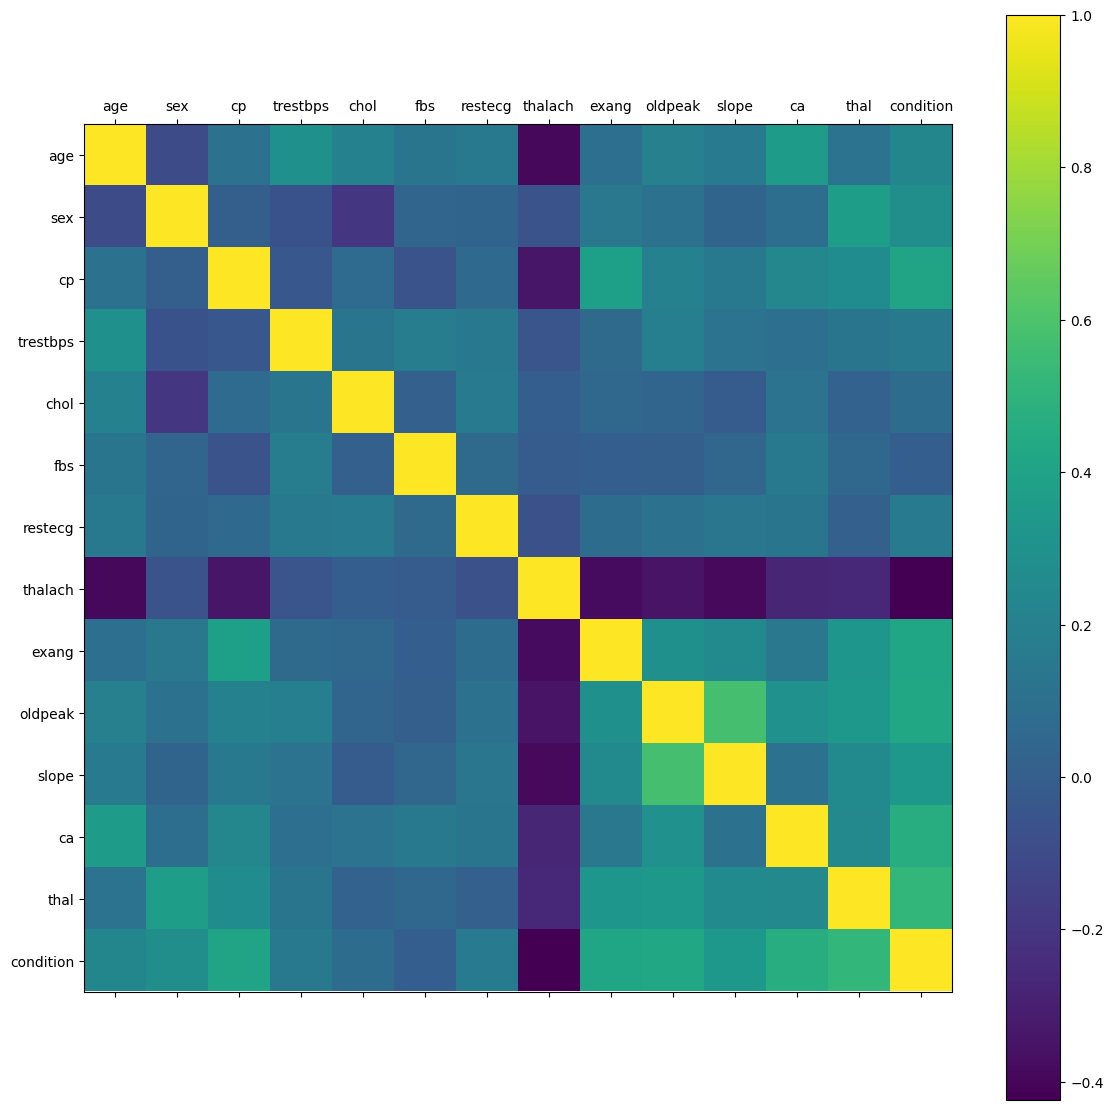

In [86]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'condition'}>, <Axes: >, <Axes: >]],
      dtype=object)

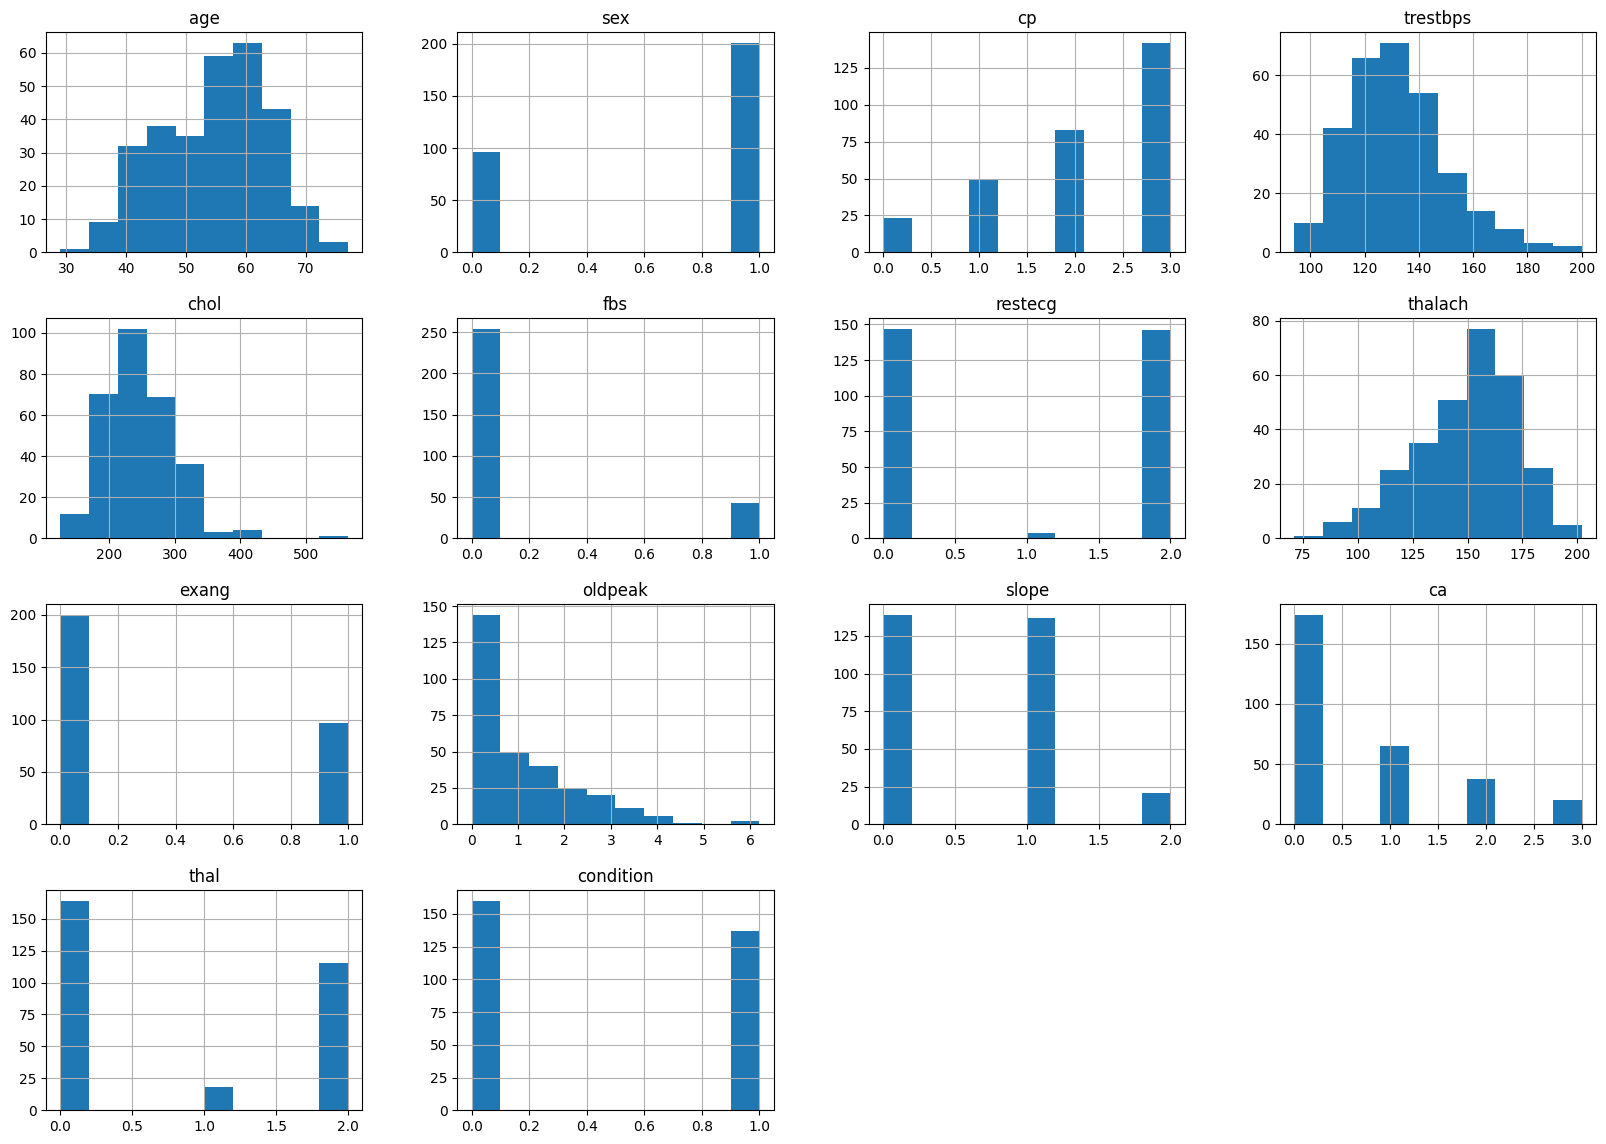

In [87]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

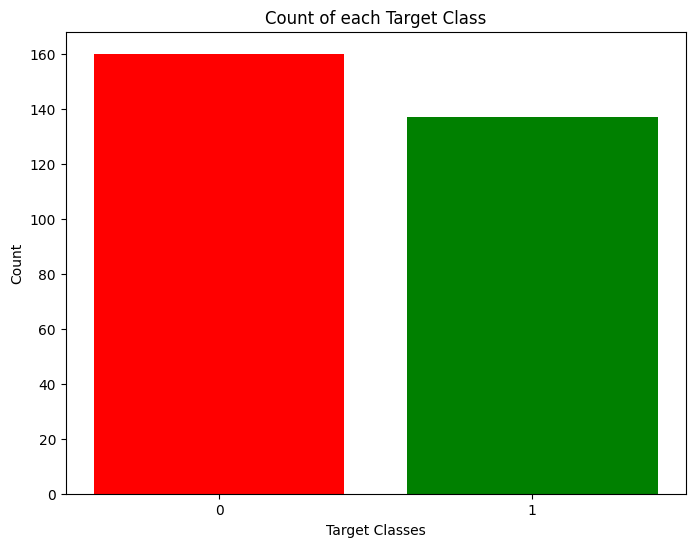

In [25]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['condition'].unique(), dataset['condition'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [26]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [27]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [29]:
y = dataset['condition']
X = dataset.drop(['condition'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [30]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

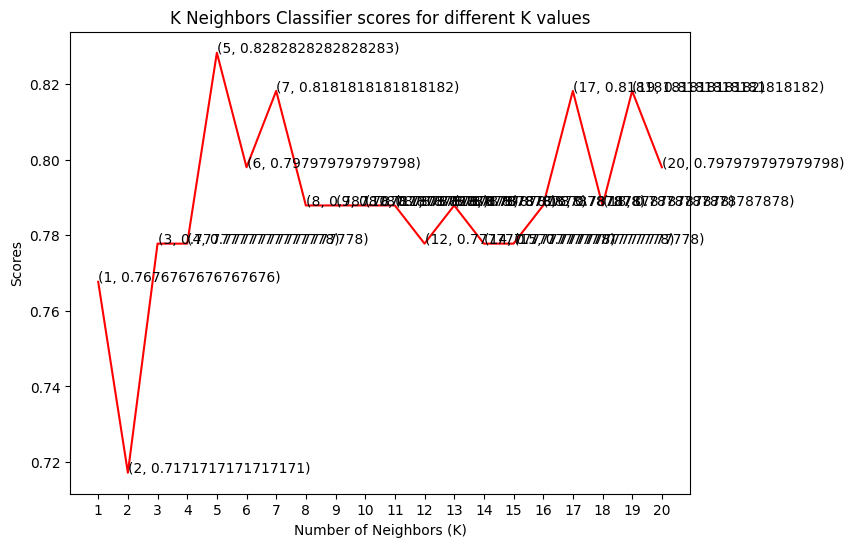

In [31]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [32]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 78.78787878787878% with 8 nieghbors.


In [33]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

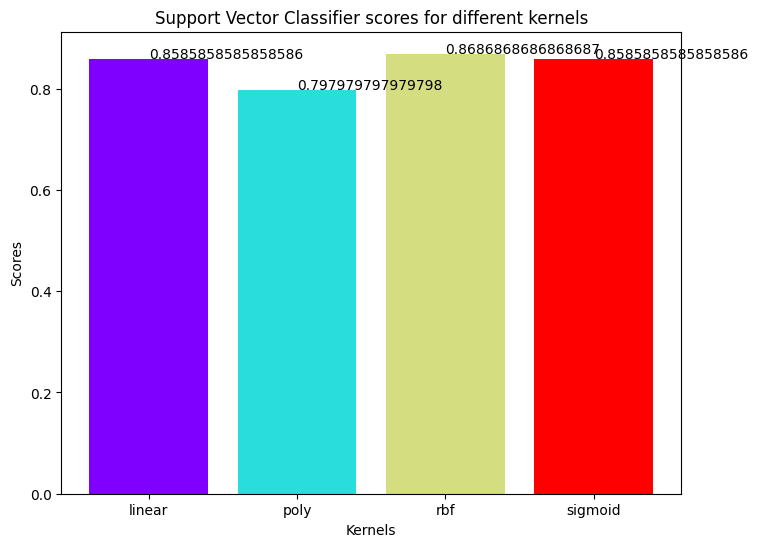

In [34]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [35]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 85.85858585858585% with linear kernel.


In [36]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

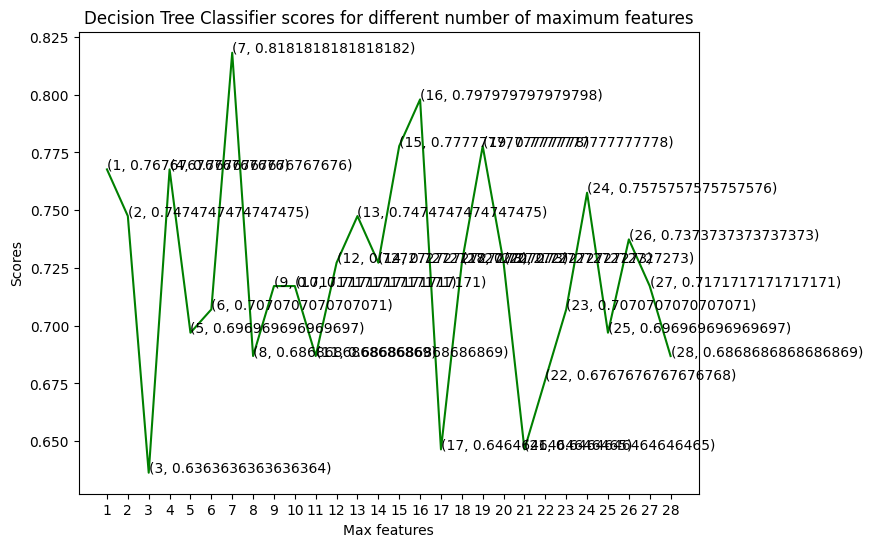

In [37]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [38]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 72.72727272727273% with [2, 4, 18] maximum features.


In [39]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

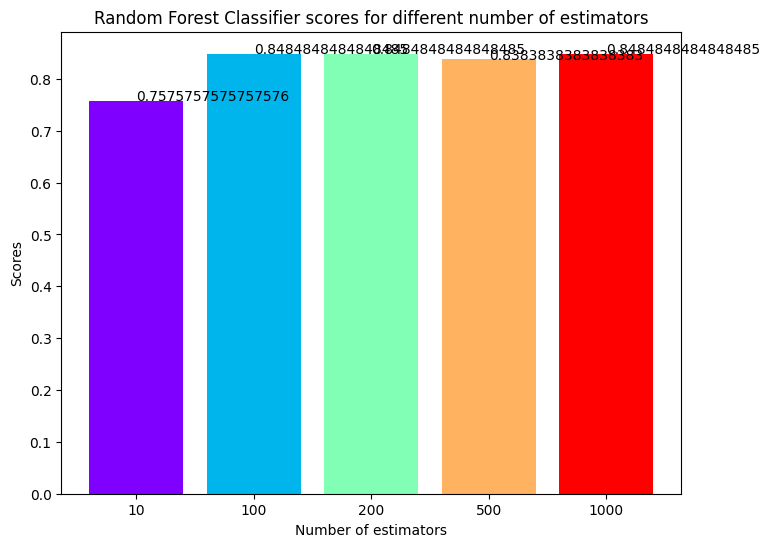

In [40]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [41]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 84.84848484848484% with [100, 500] estimators.


# Task
Create a user input interface for the trained models (KNN, SVC, Decision Tree, Random Forest), preprocess the input, make predictions using each model, and display the predictions.

In [42]:
user_input = {}
for col in X.columns:
    while True:
        try:
            value = input(f"Enter value for {col}: ")
            # Attempt to convert to appropriate type based on column data type in X_train.
            # This is a basic attempt, more robust type handling might be needed.
            if X_train[col].dtype == 'float64':
                user_input[col] = float(value)
            elif X_train[col].dtype == 'int64':
                 user_input[col] = int(value)
            else: # Assuming boolean columns from get_dummies
                user_input[col] = bool(int(value)) # Convert to int first then bool

            break # Exit the inner loop if input is valid
        except ValueError:
            print("Invalid input. Please enter a number.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

Enter value for age: 45
Enter value for trestbps: 80
Enter value for chol: 120
Enter value for thalach: 34
Enter value for oldpeak: 78
Enter value for sex_0: 3
Enter value for sex_1: 3
Enter value for cp_0: 2
Enter value for cp_1: 56
Enter value for cp_2: 76
Enter value for cp_3: 2
Enter value for fbs_0: 67
Enter value for fbs_1: 23
Enter value for restecg_0: 76
Enter value for restecg_1: 34
Enter value for restecg_2: 32
Enter value for exang_0: 76
Enter value for exang_1: 67
Enter value for slope_0: 23
Enter value for slope_1: 32
Enter value for slope_2: 23
Enter value for ca_0: 12
Enter value for ca_1: 65
Enter value for ca_2: 89
Enter value for ca_3: 54
Enter value for thal_0: 55
Enter value for thal_1: 23
Enter value for thal_2: 45


### Import Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import Model Selection and Preprocessing Libraries

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Import Classification Models

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Load Dataset

In [58]:
dataset = pd.read_csv('/content/heart_disease_and_some_scikit_learn_magic.csv') # Make sure this is the correct path and filename

### Display Dataset Info

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   # -*- coding: utf-8 -*-  824 non-null    object
dtypes: object(1)
memory usage: 9.5+ KB


In [52]:
knn_prediction = knn_classifier.predict(user_df)
svc_prediction = svc_classifier.predict(user_df)
dt_prediction = dt_classifier.predict(user_df)
rf_prediction = rf_classifier.predict(user_df)

In [54]:
print(f"KNN Prediction: {knn_prediction[0]}")
print(f"SVC Prediction: {svc_prediction[0]}")
print(f"Decision Tree Prediction: {dt_prediction[0]}")
print(f"Random Forest Prediction: {rf_prediction[0]}")

KNN Prediction: 1
SVC Prediction: 0
Decision Tree Prediction: 1
Random Forest Prediction: 1


In [50]:
user_df = pd.DataFrame([user_input])
user_df = user_df[X.columns]

columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
user_df[columns_to_scale] = standardScaler.transform(user_df[columns_to_scale])

display(user_df)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,-4.044733,-4.945255,-4.110004,-4.086788,4.247228,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [49]:
user_input = {}
for col in X.columns:
    while True:
        try:
            value = input(f"Enter value for {col}: ")
            # Attempt to convert to appropriate type based on column data type in X_train.
            # This is a basic attempt, more robust type handling might be needed.
            if X_train[col].dtype == 'float64':
                user_input[col] = float(value)
            elif X_train[col].dtype == 'int64':
                 user_input[col] = int(value)
            else: # Assuming boolean columns from get_dummies
                user_input[col] = bool(int(value)) # Convert to int first then bool

            break # Exit the inner loop if input is valid
        except ValueError:
            print("Invalid input. Please enter a number.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

Enter value for age: 18
Enter value for trestbps: 44
Enter value for chol: 34
Enter value for thalach: 56
Enter value for oldpeak: 
Invalid input. Please enter a number.
Enter value for oldpeak: 6
Enter value for sex_0: 2
Enter value for sex_1: 3
Enter value for cp_0: 4
Enter value for cp_1: 5
Enter value for cp_2: 67
Enter value for cp_3: 34
Enter value for fbs_0: 24
Enter value for fbs_1: 98
Enter value for restecg_0: 65
Enter value for restecg_1: 54
Enter value for restecg_2: 56
Enter value for exang_0: 43
Enter value for exang_1: 23
Enter value for slope_0: 45
Enter value for slope_1: 67
Enter value for slope_2: 87
Enter value for ca_0: 55
Enter value for ca_1: 43
Enter value for ca_2: 56
Enter value for ca_3: 78
Enter value for thal_0: 47
Enter value for thal_1: 33
Enter value for thal_2: 41


In [44]:
user_df = pd.DataFrame([user_input])
user_df = user_df[X.columns]

columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
user_df[columns_to_scale] = standardScaler.transform(user_df[columns_to_scale])

display(user_df)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,-1.056185,-2.915128,-2.453289,-5.047365,66.094505,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [46]:
knn_prediction = knn_classifier.predict(user_df)
svc_prediction = svc_classifier.predict(user_df)
dt_prediction = dt_classifier.predict(user_df)
rf_prediction = rf_classifier.predict(user_df)

In [48]:
print(f"KNN Prediction: {knn_prediction[0]}")
print(f"SVC Prediction: {svc_prediction[0]}")
print(f"Decision Tree Prediction: {dt_prediction[0]}")
print(f"Random Forest Prediction: {rf_prediction[0]}")

KNN Prediction: 1
SVC Prediction: 1
Decision Tree Prediction: 1
Random Forest Prediction: 1
